In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
R = 40e6  #Ohm
C = 250e-12 #F

V_rep = -0.07 #V
V_L = -0.05   #V
V_redef = -0.08  #V

tau_ref = 2e-3     #s
dt = 0.01e-3   #s
tmax = 5    #s
tau_a = 0.2 #s

b = 1e-9    #S

V0 = V_rep  #V
G0 = 0

In [3]:
def corrente(t, I):
    return I*(t>=0)


def solucao(v0, g0, dt, I, t):
    V = np.zeros(np.size(I))
    Ga = np.zeros(np.size(I))
    intervalos_t = []
    disparos = 0

    V[0] = v0
    Ga[0] = g0

    for i in range(np.size(t)-1):
        v = V[i]
        ga = Ga[i]

        if v >= V_L:
            V[i+1] = V_redef
            Ga[i+1] = ga + b

            disparos += 1
            intervalos_t.append(t[i])
        else:
            V[i+1] = v + dt * ( (1/R * (V_rep - v) + ga * (V_redef - v) + I[i]) / C )
            Ga[i+1] = ga + dt * ( -ga / tau_a)


    return disparos, intervalos_t

In [4]:
t = np.arange(0, tmax, dt)
frequencias_Tinf = []
frequencias_T1 = []
I_inj = []

In [5]:
for i in range(400, 800, 20):
    valor_I = i * 1e-12
    I = corrente(t, valor_I)

    disparos, intervalos_t = solucao(V0, G0, dt, I, t)

    if np.size(intervalos_t) >= 2:
        T_inf = intervalos_t[-1] - intervalos_t[-2]
        T1 = intervalos_t[1] - intervalos_t[0]

        freq_Tinf = 1 / T_inf
        freq_T1 = 1 / T1
    else:
        freq_Tinf = 0
        freq_T1 = 0

    frequencias_Tinf.append(freq_Tinf)
    frequencias_T1.append(freq_T1)

    I_inj.append(valor_I)

In [6]:
I_inj = np.array(I_inj)

In [7]:
plt.style.use('bmh')

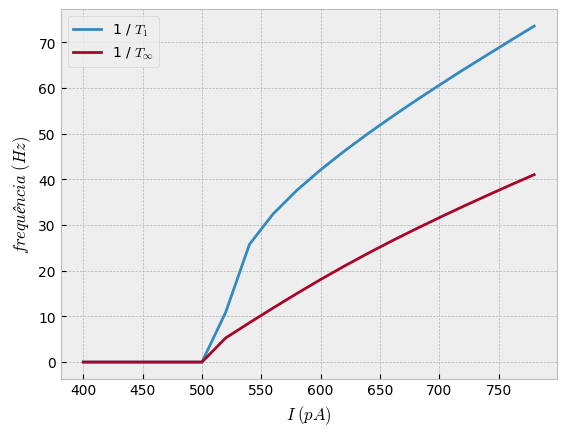

In [8]:
plt.figure()

plt.plot(I_inj*1e12, frequencias_T1, label=r'1 / $T_1$')
plt.plot(I_inj*1e12, frequencias_Tinf, label=r'1 / $T_\infty$')
plt.legend()

plt.ylabel(r'$frequência \; (Hz)$')
plt.xlabel(r'$I \; (pA)$')

plt.show()